<a href="https://colab.research.google.com/github/Srinivas1258/ML-DL/blob/master/Facial_expression_recogntion/Facial_expr_recg_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the data from google drive 

In [1]:
!pip install tqdm
!pip install facenet-pytorch

     |████████████████████████████████| 1.9MB 7.7MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# ! cp drive/My\ Drive/Projects_from_colab/fer2013_X.npy /content
# ! cp drive/My\ Drive/Projects_from_colab/fer2013_y.npy /content
!! cp drive/My\ Drive/Projects_from_colab/face_recognition.h5 /content

# !tar -xzf fer2013.tar.gz
# ! cp fer2013_y.npy 'drive/My Drive/'
# ! ls  'drive/My Drive/'

[]

In [6]:
!ls 

drive  face_recognition.h5  fer2013_X.npy  fer2013_y.npy  sample_data


Import essential libraries

In [7]:
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.utils import  to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tqdm.notebook import tqdm


loading fer2013 dataset 

In [ ]:
# data=pd.read_csv('fer2013/fer2013.csv')


In [ ]:
# data=data.drop(columns=['Usage'])
# data.head()
# X=data.iloc[:,1:]
# Y=data.iloc[:,0:1]

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
# X_train=X_train.reshape(-1,48,48,1)
# X_test=X_test.reshape(X_test.shape[0],-1)/255.0
# y_train=to_categorical(y_train)
# y_test=to_categorical(y_test)
# X_train


Data preprocessing

In [ ]:
# FER2013_WIDTH = 48
# FER2013_HEIGHT = 48



In [ ]:
'''def fer2013_show_instance(index):
    """Shows the image and the emotion label of the index's instance."""
    image = np.reshape(data.at[index, "pixels"].split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")
    image -= np.mean(image)
    image /= np.std(image)
    print(Emotions[data.at[index, "emotion"]])
    plt.imshow(image, cmap="gray") '''

'def fer2013_show_instance(index):\n    """Shows the image and the emotion label of the index\'s instance."""\n    image = np.reshape(data.at[index, "pixels"].split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")\n    image -= np.mean(image)\n    image /= np.std(image)\n    print(Emotions[data.at[index, "emotion"]])\n    plt.imshow(image, cmap="gray") '

In [ ]:
# fer2013_show_instance(np.random.randint(0,len(data)))

In [ ]:
'''
def fer2013_to_X():
    """Transforms the (blank separated) pixel strings in the DataFrame to an 3-dimensional array 
    (1st dim: instances, 2nd and 3rd dims represent 2D image)."""
    
    X = []
    pixels_list = data["pixels"].values
    
    for pixels in pixels_list:
        single_image = np.reshape(pixels.split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")
        X.append(single_image)
        
    # Convert list to 4D array:
    X = np.expand_dims(np.array(X), -1)
    
    # Normalize image data:
    X -= np.mean(X, axis=0)
    X /= np.std(X, axis=0)
    
    return X '''

'\ndef fer2013_to_X():\n    """Transforms the (blank separated) pixel strings in the DataFrame to an 3-dimensional array \n    (1st dim: instances, 2nd and 3rd dims represent 2D image)."""\n    \n    X = []\n    pixels_list = data["pixels"].values\n    \n    for pixels in pixels_list:\n        single_image = np.reshape(pixels.split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")\n        X.append(single_image)\n        \n    # Convert list to 4D array:\n    X = np.expand_dims(np.array(X), -1)\n    \n    # Normalize image data:\n    X -= np.mean(X, axis=0)\n    X /= np.std(X, axis=0)\n    \n    return X '

this data already preprocessed for computational purposes and directly to load as numpy array and preprocessing is done already

In [8]:
X=np.load('fer2013_X.npy') # direct loading preprocessing data 
y=np.load('fer2013_y.npy')

In [9]:
# Get features (image data)
# X = fer2013_to_X()
X.shape

(35887, 48, 48, 1)

In [ ]:
# y = pd.get_dummies(data['emotion']).values
# y.shape

In [ ]:
# Save data
# np.save("fer2013_X", X)
# np.save("fer2013_y", y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.dtype

dtype('float64')

In [ ]:
# X_train[0]

In [ ]:
model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',input_shape=(48,48,1)))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(l=0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(l=0.01)))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(l=0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(l=0.01)))
model.add(BatchNormalization())
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(l=0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(l=0.01)))
model.add(BatchNormalization())
model.add(Conv2D(512,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(l=0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7,activation='softmax'))

model.summary()



model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)       5

In [ ]:
history=model.fit(X_train,y_train,batch_size=64,epochs=100,steps_per_epoch=len(X_train)/128,validation_data=(X_test,y_test))


Epoch 1/100
225/224 [==============================] - 12s 51ms/step - loss: 9.9824 - accuracy: 0.3220 - val_loss: 4.3892 - val_accuracy: 0.1726
Epoch 2/100
225/224 [==============================] - 12s 51ms/step - loss: 2.8516 - accuracy: 0.4173 - val_loss: 2.4486 - val_accuracy: 0.3452
Epoch 3/100
225/224 [==============================] - 11s 50ms/step - loss: 2.1105 - accuracy: 0.4408 - val_loss: 2.0144 - val_accuracy: 0.4303
Epoch 4/100
225/224 [==============================] - 11s 50ms/step - loss: 1.9136 - accuracy: 0.4637 - val_loss: 1.9002 - val_accuracy: 0.4687
Epoch 5/100
225/224 [==============================] - 11s 51ms/step - loss: 1.8648 - accuracy: 0.4769 - val_loss: 1.8356 - val_accuracy: 0.4912
Epoch 6/100
225/224 [==============================] - 12s 51ms/step - loss: 1.8790 - accuracy: 0.4722 - val_loss: 1.8762 - val_accuracy: 0.4563
Epoch 7/100
225/224 [==============================] - 12s 52ms/step - loss: 1.8497 - accuracy: 0.4818 - val_loss: 1.8554 - val_ac

In [ ]:
model.evaluate(X_test,y_test)

225/225 [==============================] - 2s 9ms/step - loss: 1.3256 - accuracy: 0.5819


[1.3255500793457031, 0.5819169878959656]

In [12]:
# model.save('drive/My\ Drive/Facial_recognition/face_recognition.h5')
# Recreate the exact same model, including its weights and the optimizer
from tensorflow.keras.models import load_model
model = load_model('face_recognition.h5')

# Show the model architecture
# new_model.summary()

Text(0.5, 1.0, 'val accuracy')

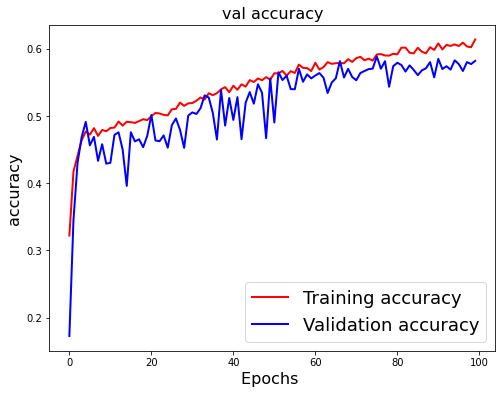

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

In [ ]:
from google.colab import files
files.upload()

Saving disgust.jpg to disgust.jpg
Saving fear.jpg to fear.jpg


{'disgust.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc2\x00\x11\x08\x03R\x025\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x01\x04\x05\x06\x07\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xfa\xa0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05e\x8eV\x8cz7\x99\xcczG\xcbS_S|\x9e\xaa\xfa\xd5?"\xae>\xbd?\x8dd\xfbk\xe4\x1d\x8a\xfa;\xcd\xf7\xaen\x14\

In [ ]:
def get_labels(pred):
   labels=[]
   for i in pred:
     if i==0:
       labels.append('Angry')
     elif i==1:
       labels.append('Disgust')
     elif i==2:
        labels.append('Fear')
     elif i==3:
        labels.append('Happy')
     elif i==4:
        labels.append('Sad')
     elif i==5:
        labels.append('Surprise')
     else:
        labels.append('Neutral')
   return labels

testing the image here upload image and get the predictions

sometimes model doesn't perfrom really well in some images.

check for top 2 predictions will give best results max.

In [ ]:
from google.colab import files  # external image uploading and testing
files.upload()

In [ ]:
from facenet_pytorch import MTCNN
from PIL import Image

file_name='photo.jpg'          # enter the file name to test
img1=cv2.imread(file_name,0)
# IMG_PATH = 'happy_face.jpg'
img = Image.open(file_name)

face_model = MTCNN(keep_all=True)        # pretrained multitask CNN for finding faces
bboxes, probs = face_model.detect(img)
x1, y1, width, height=bboxes[0][0],bboxes[0][1],bboxes[0][2],bboxes[0][3]
face = img1[int(y1):int(height),int(x1):int(width)]
plt.imshow(face)

In [ ]:
# for x,y,w,h in bboxes:
  # print(x,w,w,h)

In [ ]:
import cv2
# img=cv2.imread('angry.jpg',0)
img2=cv2.resize(face,(48,48))
plt.imshow((img2))
img2=img2.astype(np.float64)
img2 -= np.mean(img2, axis=0)
img2 /= np.std(img2, axis=0)
img2=img2.reshape(-1,48,48,1)
new_image_pred=model.predict(img2)
# classes=model.predict_classes(img2)
# prob=model.predict_proba(img2)
label=np.argmax(new_image_pred,axis=1)
# print(new_image_pred)
label=get_labels(label)
label

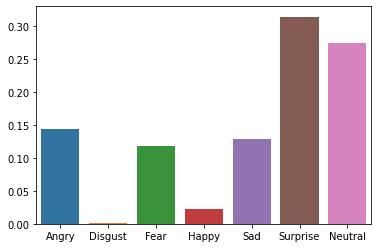

In [ ]:
Emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
pred_results=pd.DataFrame(data=new_image_pred,columns=Emotions)
# pred_results.head()
import seaborn as sns
# sns.set_theme(style="darkgrid")
ax=sns.barplot(data=pred_results)
plt.show()

code below is the alternative to use webcam in colab as we have to google api to do that .so we have to capture image and then apply model to get predictions

In [13]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from facenet_pytorch import MTCNN
from PIL import Image
Emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

file_name='photo.jpg'          # enter the file name to test
img1=cv2.imread(file_name,0)
# IMG_PATH = 'happy_face.jpg'
img = Image.open(file_name)

face_model = MTCNN(keep_all=True)        # pretrained multitask CNN for finding faces
bboxes, probs = face_model.detect(img)
x1, y1, width, height=bboxes[0][0],bboxes[0][1],bboxes[0][2],bboxes[0][3]
face = img1[int(y1):int(height),int(x1):int(width)]
plt.imshow(face)




In [ ]:

import cv2
# img=cv2.imread('angry.jpg',0)
img2=cv2.resize(face,(48,48))
plt.imshow((img2))
img2=img2.astype(np.float64)
img2 -= np.mean(img2, axis=0)
img2 /= np.std(img2, axis=0)
img2=img2.reshape(-1,48,48,1)
new_image_pred=model.predict(img2)
# classes=model.predict_classes(img2)
# prob=model.predict_proba(img2)
label=np.argmax(new_image_pred)
# print(new_image_pred)

label=Emotions[label]
print(label)

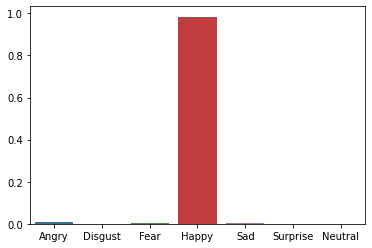

In [17]:
pred_results=pd.DataFrame(data=new_image_pred,columns=Emotions)
# pred_results.head()
import seaborn as sns
# sns.set_theme(style="darkgrid")
ax=sns.barplot(data=pred_results)
plt.show()

In order to detect from webcam colab not supported to use our local hardware bcoz we r using colab as iaas. so the below the code will run sucessfully in our local system if all the required the packages are installed

In [28]:
'''' this is code to run your webcam on your system not using colab webcam api
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras import models

#Load the saved model
model = models.load_model('face_recognition.h5')  # externally load the model 
video = cv2.VideoCapture(0)

while True:
        
      ret, frame = video.read()
        # plt.imshow(frame)
      if ret==True:
          print('entering ')
          #Convert the captured frame into gray
          gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
          bboxes, probs = face_model.detect(gray)
          for x,y,w,h in bboxes:
              face = gray[int(y):int(h),int(x):int(w)]

            #Resizing into 128x128 because we trained the model with this image size.
              im = face.resize((48,48))
              img2 -= np.mean(im, axis=0)
              img2 /= np.std(img2, axis=0)
              img2=img2.reshape(-1,48,48,1)
              img_array = np.array(img2)

              #Our keras model used a 4D tensor, (images x height x width x channel)
              #So changing dimension 128x128x3 into 1x128x128x3 
              # img_array = np.expand_dims(img_array, axis=0)

              #Calling the predict method on model to predict 'me' on the image
              prediction = model.predict(img_array)
              label=np.argmax(prediction)
              score = np.max(prediction)
              label=get_labels(label)
              cv2.putText(frame, label+"  "+str(score*100)+'%', (x, y), font, 1, (0, 255, 0), 2)
              cv2.rectangle(frame, (x, y), (w, h), (0, 0, 255), 2)


          cv2.imshow('image',frame)
        
          if cv2.waitKey(1) == 10:
                break
      else :
        print('error')

        
video.release()
cv2.destroyAllWindows() '''

'\' this is code to run your webcam on your system not using colab webcam api\nimport cv2\nimport numpy as np\nfrom PIL import Image\nfrom tensorflow.keras import models\n\n#Load the saved model\nmodel = models.load_model(\'face_recognition.h5\')  # externally load the model \nvideo = cv2.VideoCapture(0)\n\nwhile True:\n        \n      ret, frame = video.read()\n        # plt.imshow(frame)\n      if ret==True:\n          print(\'entering \')\n          #Convert the captured frame into gray\n          gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)\n          bboxes, probs = face_model.detect(gray)\n          for x,y,w,h in bboxes:\n              face = gray[int(y):int(h),int(x):int(w)]\n\n            #Resizing into 128x128 because we trained the model with this image size.\n              im = face.resize((48,48))\n              img2 -= np.mean(im, axis=0)\n              img2 /= np.std(img2, axis=0)\n              img2=img2.reshape(-1,48,48,1)\n              img_array = np.array(img2)\n\

Recording video using webcam and then predicting on each frame in video...

In [19]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def record_video(filename='video.mp4'):

  # This function uses the take_photo() function provided by the Colab team as a  
  # starting point, along with a bunch of stuff from Stack overflow, and some sample code 
  # from: https://developer.mozilla.org/enUS/docs/Web/API/MediaStream_Recording_API

  js = Javascript("""
    async function recordVideo() {
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");
      capture.textContent = "Start Recording";
      capture.style.background = "green";
      capture.style.color = "white";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);
      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();

      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
      return btoa(binaryString);
    }
    """)
  try:
    display(js)
    data = eval_js('recordVideo({})')
    binary = b64decode(data)
    with open(filename, "wb") as video_file:
      video_file.write(binary)
    print(
        f"Finished recording video. Saved binary under filename in current working directory: {filename}"
    )
  except Exception as err:
      # In case any exceptions arise
      print(str(err))
  return filename

In [ ]:
# Run the function, get the video path as saved in your notebook, and play it back here.
from IPython.display import HTML
from base64 import b64encode

video_width = 300

video_path = record_video()
video_file = open(video_path, "r+b").read()

video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

enter the name of video if not video.mp4

In [ ]:
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras import models
from google.colab.patches import cv2_imshow
emotion =  ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
font = cv2.FONT_HERSHEY_SIMPLEX
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#Load the saved model
# model = models.load_model('face_recognition.h5')  # externally load the model 
video = cv2.VideoCapture('video.mp4')     # please enter the name of video recorded

while True:
        
      ret, frame = video.read()
        # plt.imshow(frame)
      if ret==True:
              # print('entering ')
              #Convert the captured frame into gray
              img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
              # print(img.shape)

              faces = face_cascade.detectMultiScale(img, 1.3, 5) 
  
              for (x,y,w,h) in faces: 
                  
                im = img[y:y+h, x:x+w] 
                # roi_color = img[y:y+h, x:x+w] 
                # plt.imshow(im)
              # bboxes, probs = face_model.detect(gray)
              # print(bboxes)
              # for x,y,w,h in bboxes:
                # face = gray[int(y):int(h),int(x):int(w)]

              #Resizing into 128x128 because we trained the model with this image size.
                im = cv2.resize(im,(48,48))
                # plt.imshow(im)
                # img2=img2.astype(np.float64)
                im=np.array(im).astype(np.float64)
                im -= np.mean(im, axis=0)
                im /= np.std(im, axis=0)
                im=im.reshape(-1,48,48,1)
                # img_array = np.array(im)

                #Our keras model used a 4D tensor, (images x height x width x channel)
                #So changing dimension 128x128x3 into 1x128x128x3 
                # img_array = np.expand_dims(img_array, axis=0)

                #Calling the predict method on model to predict 'me' on the image
                prediction = model.predict(im)
                label=np.argmax(prediction)
                score = np.max(prediction)
                label=emotion[label]
                cv2.putText(frame, label+"  "+str(score*100)+'%', (x, y), font, 1, (0, 255, 0), 2)
                # cv2.rectangle(frame, (x, y), (w, h), (0, 0, 255), 2)
                # cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)


                cv2_imshow(frame)
        
                k = cv2.waitKey(1) & 0xff
                if k == 27: 
                  break
          # if cv2.waitKey(1) == 10:
                #  break
      else :
        break

        
video.release()
cv2.destroyAllWindows()

In [ ]:
!ls

drive		     fer2013_X.npy  happy_face.jpg  sample_data
face_recognition.h5  fer2013_y.npy  photo.jpg	    video.mp4


In [ ]:
'''
from google.colab.patches import cv2_imshow
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
img = cv2.imread('happy_face.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows() 
'''

Prediction to fetch on youtube 

In [ ]:
!pip install youtube-search-python

In [ ]:
from youtubesearchpython import SearchVideos # if label is single then only it will predict

search = SearchVideos(label, offset = 1, mode = "json", max_results = 10)
print(search.result())